In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
df=pd.read_csv(r"D:\PGCP-DSML RITHEESH V\Mini Project\Mini Project-UsedCarsData-1\UsedCarsData.csv")
df.head()

,Sales_ID,name,Company name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti Swift Dzire VDI,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5,Y
1,2,Skoda Rapid 1.5 TDI Ambition,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5,Y
2,3,Honda City 2017-2020 EXi,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai i20 Sportz Diesel,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti Swift VXI BSIII,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5,Y


# DATA MANIPULATION

Here are some indicative types of analysis you can perform. Please note that this is not an
exhaustive list, you may add more

● Come up with appropriate results for the following:

a. Which brands are selling most?

b. Are there specific locations selling more?

c. Which factors are more important in deciding cars' selling price? Ex. kms driven
or type of owner or fuel type?

In [3]:
df['car_age']=2023-df['year']

In [4]:
df

,Sales_ID,name,Company name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold,car_age
0,1,Maruti Swift Dzire VDI,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5,Y,9
1,2,Skoda Rapid 1.5 TDI Ambition,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5,Y,9
2,3,Honda City 2017-2020 EXi,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5,Y,17
3,4,Hyundai i20 Sportz Diesel,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5,Y,13
4,5,Maruti Swift VXI BSIII,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5,Y,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8124,Hyundai i20 Magna,Hyundai,2013,320000,110000,Central,Texas,Plano,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5,N,10
7902,8125,Hyundai Verna CRDi SX,Hyundai,2007,135000,119000,Central,Texas,Port Arthur,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5,N,16
7903,8126,Maruti Swift Dzire ZDi,Maruti,2009,382000,120000,Central,Texas,Port Arthur,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5,N,14
7904,8127,Tata Indigo CR4,Tata,2013,290000,25000,East,Massachusetts,Lunenburg,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5,N,10


In [5]:
df1=df.copy()

In [6]:
df1['mileage']=df1['mileage'].str.replace('kmpl','')
df1['mileage']=df1['mileage'].str.replace('km/kg','')
df1['mileage']=pd.to_numeric(df1['mileage'])
df1['engine']= df1['engine'].str.replace('CC','')
df1['engine']=pd.to_numeric(df1['engine'])
df1['max_power']=df1['max_power'].str.replace('bhp','')
df1['max_power']=pd.to_numeric(df1['max_power'])

In [7]:
df1

,Sales_ID,name,Company name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold,car_age
0,1,Maruti Swift Dzire VDI,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y,9
1,2,Skoda Rapid 1.5 TDI Ambition,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y,9
2,3,Honda City 2017-2020 EXi,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y,17
3,4,Hyundai i20 Sportz Diesel,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y,13
4,5,Maruti Swift VXI BSIII,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8124,Hyundai i20 Magna,Hyundai,2013,320000,110000,Central,Texas,Plano,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5,N,10
7902,8125,Hyundai Verna CRDi SX,Hyundai,2007,135000,119000,Central,Texas,Port Arthur,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5,N,16
7903,8126,Maruti Swift Dzire ZDi,Maruti,2009,382000,120000,Central,Texas,Port Arthur,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,190Nm@ 2000rpm,5,N,14
7904,8127,Tata Indigo CR4,Tata,2013,290000,25000,East,Massachusetts,Lunenburg,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5,N,10


## 1 .Which company cars come into used cars market more 

In [8]:
df1['Company name'].value_counts().head()

Maruti      2367
Hyundai     1360
Mahindra     758
Tata         719
Honda        466
Name: Company name, dtype: int64

### Maruti cars comes into used cars market more

## 2 .Which brands are selling most?

In [9]:
df1[df1['sold']=='Y']['Company name'].value_counts().head()

Maruti      597
Hyundai     332
Mahindra    201
Tata        178
Toyota      126
Name: Company name, dtype: int64

### Maruti cars are selling the most

## 3 .Which brands models are selling most 

In [10]:
df1[df1['sold']=='Y']['name'].value_counts().head()

Maruti Swift Dzire VDI        42
Maruti Alto 800 LXI           21
BMW X4 M Sport X xDrive20d    19
Maruti Wagon R VXI BS IV      16
Maruti Wagon R LXI            15
Name: name, dtype: int64

### The most selling models are given in order
 - Maruti Swift Dzire VDI        
 - Maruti Alto 800 LXI           
 - BMW X4 M Sport X xDrive20d    
 - Maruti Wagon R VXI BS IV      
 - Maruti Wagon R LXI            

## 4 .Condition of Used Cars
- Car age under 10 years **Superb**
- Car age between 10-20 years **Good**
- Car age above 30 years **Fair**

In [11]:
def car_condition(x):
    if x <=10:
        return "Superb"
    elif x>=20:
        return "Fair"
    else:
        return "Good"

In [12]:
df1['Car_condition']=df1['car_age'].apply(car_condition)

In [13]:
df1['Car_condition'].value_counts(normalize=True)*100

Superb    68.201366
Good      30.356691
Fair       1.441943
Name: Car_condition, dtype: float64

### 68% of the cars are in Superb Condition

## 5.Which car model has the maximum selling price

In [14]:
df1.groupby('name')['selling_price'].max().sort_values(ascending=False).head()

name
Volvo XC90 T8 Excellence BSIV       10000000
BMW X7 xDrive 30d DPE                7200000
Audi A6 35 TFSI Matrix               6523000
Mercedes-Benz S-Class S 350 CDI      6000000
BMW 6 Series GT 630d Luxury Line     6000000
Name: selling_price, dtype: int64

### Volvo XC90 T8 Excellence BSIV has the maximum selling price of 1Cr

## 6 .Which car has travelled more distance

In [15]:
df1.groupby('name')['km_driven'].max().sort_values(ascending=False).head()

name
Hyundai i20 Asta 1.2                             2360457
Mahindra XUV500 W6 2WD                           1500000
Maruti Wagon R LXI Minor                          577414
Maruti Wagon R VXI BS IV                          500000
Toyota Innova 2.5 EV Diesel PS 7 Seater BSIII     500000
Name: km_driven, dtype: int64

### Hyundai i20 Asta 1.2 has travelled more distance of 23L+ Kms

In [16]:
df1[(df1['name']=='Hyundai i20 Asta 1.2')&(df1['km_driven']==2360457)]

,Sales_ID,name,Company name,year,selling_price,km_driven,Region,State or Province,City,fuel,...,transmission,owner,mileage,engine,max_power,torque,seats,sold,car_age,Car_condition
3377,3487,Hyundai i20 Asta 1.2,Hyundai,2007,550000,2360457,South,Mississippi,Clinton,Petrol,...,Manual,Second Owner,18.6,1197,81.83,114.7Nm@ 4000rpm,5,N,16,Good


In [17]:
df1[(df1['name']=='Hyundai i20 Asta 1.2')&(df1['km_driven'])]

,Sales_ID,name,Company name,year,selling_price,km_driven,Region,State or Province,City,fuel,...,transmission,owner,mileage,engine,max_power,torque,seats,sold,car_age,Car_condition
3377,3487,Hyundai i20 Asta 1.2,Hyundai,2007,550000,2360457,South,Mississippi,Clinton,Petrol,...,Manual,Second Owner,18.6,1197,81.83,114.7Nm@ 4000rpm,5,N,16,Good
6100,6274,Hyundai i20 Asta 1.2,Hyundai,2018,700000,28451,East,Maine,Sanford,Petrol,...,Manual,First Owner,18.6,1197,81.83,114.7Nm@ 4000rpm,5,N,5,Superb


## 7 .Which region has sold more cars 

In [18]:
df1[df1['sold']=='Y']['Region'].value_counts(normalize=True)*100

East       31.50
Central    27.00
West       24.35
South      17.15
Name: Region, dtype: float64

### East region has sold more cars which is 31.5%

## 8 .Which fuel type cars sells the most

In [19]:
df1[df1['sold']=='Y']['fuel'].value_counts()

Diesel    1052
Petrol     935
CNG          7
LPG          6
Name: fuel, dtype: int64

### Diesel type cars are sold the most 

## 9 .Which seller sells more cars

In [20]:
df1[df1['sold']=='Y']['seller_type'].value_counts()
#df['seller_type'].value_counts()

Individual          1629
Dealer               291
Trustmark Dealer      80
Name: seller_type, dtype: int64

### Individual sellers sold more cars 

## 10 .Which transmission type does buyers prefer

In [21]:
df1[df1['sold']=='Y']['transmission'].value_counts()

Manual       1714
Automatic     286
Name: transmission, dtype: int64

### Buyers prefer manual transmission type cars and it is sold the most

## 11 .Which owner type cars did buyers purchase more

In [22]:
df1[df1['sold']=='Y']['owner'].value_counts()

First Owner             1326
Second Owner             490
Third Owner              135
Fourth & Above Owner      49
Name: owner, dtype: int64

### First owners cars are sold in more numbers 

## 12 .Which fuel type car gives more mileage 

In [23]:
df1.groupby('fuel')['mileage'].value_counts()

fuel    mileage
CNG     21.94      16
        26.60      13
        13.20       3
        33.44       3
        26.20       2
                   ..
Petrol  20.28       1
        20.65       1
        23.00       1
        23.87       1
        42.00       1
Name: mileage, Length: 481, dtype: int64

### Cars with CNG(Compressed Natural Gas) gives more mileage 

## 13 .How many seats does buyer prefer in a car

In [24]:
df1[df1['sold']=='Y']['seats'].value_counts()

5     1568
7      287
8       66
4       34
9       25
6       18
10       2
Name: seats, dtype: int64

### Buyers prefer buying cars with 5 seats

## 14 .Top 5 State or Province with highest car sales

In [25]:
df1[(df1['sold']=='Y')]['State or Province'].value_counts().head()

New York      293
California    274
Illinois      148
Texas         138
Washington    120
Name: State or Province, dtype: int64

## 15 .Top 5 cities with high number of used car buyers

In [26]:
df1[(df1['sold']=='Y')]['City'].value_counts().head()

New York City    196
Los Angeles      191
Seattle           86
Chicago           83
Boston            69
Name: City, dtype: int64

# STATISTICAL ANALYSIS

In [27]:
df2=df1.copy()

In [28]:
df2.head()

,Sales_ID,name,Company name,year,selling_price,km_driven,Region,State or Province,City,fuel,...,transmission,owner,mileage,engine,max_power,torque,seats,sold,car_age,Car_condition
0,1,Maruti Swift Dzire VDI,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,...,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y,9,Superb
1,2,Skoda Rapid 1.5 TDI Ambition,Skoda,2014,370000,120000,East,New York,New York City,Diesel,...,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y,9,Superb
2,3,Honda City 2017-2020 EXi,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,...,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y,17,Good
3,4,Hyundai i20 Sportz Diesel,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,...,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y,13,Good
4,5,Maruti Swift VXI BSIII,Maruti,2007,130000,120000,East,New York,New York City,Petrol,...,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y,16,Good


In [29]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_ID,7906.0,4070.106248,2345.770159,1.0,2037.25,4076.5,6102.00,8128.0
year,7906.0,2013.983936,3.863695,1994.0,2012.00,2015.0,2017.00,2020.0
selling_price,7906.0,649813.720845,813582.748354,29999.0,270000.00,450000.0,690000.00,10000000.0
km_driven,7906.0,69188.659752,56792.296343,1.0,35000.00,60000.0,95425.00,2360457.0
mileage,7906.0,19.419861,4.036263,0.0,16.78,19.3,22.32,42.0
engine,7906.0,1458.708829,503.893057,624.0,1197.00,1248.0,1582.00,3604.0
max_power,7906.0,91.587374,35.747216,32.8,68.05,82.0,102.00,400.0
seats,7906.0,5.416393,0.959208,2.0,5.00,5.0,5.00,14.0
car_age,7906.0,9.016064,3.863695,3.0,6.00,8.0,11.00,29.0


### Inference
- The lowest price of the car is **29999 Rs**
- The average selling price of the car is **649813.72 Rs**
- The average km_driven by a car is **69188.65 Rs**
- The mean mileage of cars is **19.41 kmpl**
- The median CC of used cars is **1248.0**	
- The mean age of the cars is **9.01**

In [30]:
df2.groupby('Company name')['selling_price'].describe().sort_values('max',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Company name,,,,,,,,
Volvo,67.0,3.272015e+06,1.158945e+06,1200000.0,2475000.00,3400000.0,3800000.0,10000000.0
BMW,118.0,4.153814e+06,1.823300e+06,480000.0,2600000.00,5400000.0,5500000.0,7200000.0
Audi,40.0,2.612200e+06,1.388758e+06,730000.0,1734999.75,2287500.0,3000000.0,6523000.0
Mercedes-Benz,54.0,2.470444e+06,1.509375e+06,400000.0,1406250.00,2075500.0,2937500.0,6000000.0
Lexus,34.0,5.150000e+06,0.000000e+00,5150000.0,5150000.00,5150000.0,5150000.0,5150000.0
Land,6.0,3.608333e+06,1.385791e+06,1650000.0,2625000.00,4500000.0,4500000.0,4500000.0
Jeep,31.0,2.149613e+06,9.912411e+05,1325000.0,1550000.00,1675000.0,2100000.0,4100000.0
Toyota,452.0,1.011920e+06,6.524597e+05,135000.0,550000.00,750000.0,1450000.0,3500000.0
Jaguar,71.0,2.915465e+06,3.195644e+05,2000000.0,2711000.00,3000000.0,3200000.0,3500000.0


### Inference
- The highest selling car is volvo with the price of **1 cr** 
- The median price of BMW car is **5400000 Rs** 

In [31]:
df2.groupby('Company name')['km_driven'].describe().sort_values('max',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Company name,,,,,,,,
Hyundai,1360.0,63812.152206,73660.732021,1000.0,31282.75,56694.5,80000.00,2360457.0
Mahindra,758.0,90674.497361,73891.022133,2000.0,50000.00,80000.0,120000.00,1500000.0
Maruti,2367.0,63567.978876,42428.676095,1.0,35000.00,60000.0,88000.00,577414.0
Toyota,452.0,101016.438053,73398.160409,1000.0,54891.00,80000.0,120000.00,500000.0
Tata,719.0,80687.777469,48810.305354,2000.0,40000.00,80000.0,110000.00,300000.0
Ford,388.0,72469.456186,44413.176357,2600.0,37120.75,70000.0,100000.00,298000.0
Mitsubishi,14.0,140463.642857,64312.633987,39000.0,105000.00,135500.0,176118.25,280000.0
Chevrolet,230.0,79785.373913,40433.918046,13500.0,55250.00,70000.0,99500.00,265000.0
Skoda,104.0,71086.144231,59108.186416,10000.0,11000.00,60000.0,116000.00,265000.0


### Inference
- on an average **Hyundai** cars have covered **63812.15 kms** and the list follows

In [32]:
df2.groupby('Region')['selling_price'].describe().sort_values('max',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East,1939.0,630165.240846,767799.714514,33351.0,265000.0,450000.0,680000.0,10000000.0
South,1615.0,720585.385759,935335.349523,31504.0,280000.0,490000.0,720000.0,7200000.0
Central,2376.0,637718.154040,802688.177049,29999.0,254999.0,450000.0,680000.0,6523000.0
West,1976.0,625796.125000,758880.432204,35000.0,270000.0,450000.0,650000.0,6000000.0


### Inference
- There is more variation in car price at south region
- The west region's cars variation is less compared to other regions

In [33]:
df2.groupby('year')['selling_price'].describe().sort_values('50%',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2019,583.0,1.776986e+06,1.856216e+06,220000.0,617500.0,779000.0,1925000.0,6523000.0
2018,806.0,9.581836e+05,8.416175e+05,200000.0,550250.0,715000.0,950000.0,6000000.0
2017,1010.0,8.901930e+05,8.464724e+05,66000.0,450000.0,645000.0,850000.0,10000000.0
2020,74.0,8.852702e+05,9.464700e+05,250000.0,445000.0,590000.0,825000.0,7200000.0
2016,856.0,7.003177e+05,5.166729e+05,150000.0,400000.0,550000.0,750000.0,4090000.0
2015,775.0,5.967703e+05,3.427458e+05,80000.0,400000.0,525000.0,650000.0,3000000.0
2014,620.0,5.166757e+05,3.524181e+05,95000.0,325000.0,450500.0,575000.0,3500000.0
2013,668.0,4.606646e+05,3.564904e+05,80000.0,260000.0,389500.0,525000.0,3750000.0
2012,621.0,3.531433e+05,2.076997e+05,45000.0,225000.0,300000.0,428000.0,1850000.0


### Inference
- 2019 car models have high median price
- 2011 car models have low median price 

In [34]:
df2.groupby('transmission')['selling_price'].describe()

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
Automatic,1041.0,1.882972e+06,1.641287e+06,75000.0,645000.0,1100000.0,2711000.0,10000000.0
Manual,6865.0,4.628191e+05,2.975717e+05,29999.0,250000.0,409999.0,610000.0,3200000.0


### Inference
- Manual cars comes into used market more
- average selling price of manual cars is 462819.1

In [35]:
df2.groupby('owner')['selling_price'].describe()

,count,mean,std,min,25%,50%,75%,max
owner,,,,,,,,
First Owner,5215.0,7.899799e+05,9.362189e+05,30000.0,350000.0,550000.0,758500.0,10000000.0
Fourth & Above Owner,160.0,2.331968e+05,1.586916e+05,31000.0,110000.0,185000.0,350000.0,810000.0
Second Owner,2016.0,4.012035e+05,3.273804e+05,35000.0,195000.0,320000.0,509999.0,3000000.0
Test Drive Car,5.0,4.403800e+06,2.510598e+06,1350000.0,2000000.0,5923000.0,6223000.0,6523000.0
Third Owner,510.0,2.931873e+05,2.303804e+05,29999.0,150000.0,230499.5,367500.0,2000000.0


### Inference 
- The average price of first owner cars is 789979.9 Rs 

In [36]:
df2.groupby('seller_type')['selling_price'].describe()

,count,mean,std,min,25%,50%,75%,max
seller_type,,,,,,,,
Dealer,1107.0,1.459910e+06,1.576638e+06,60000.0,475000.0,700000.0,1881999.0,6523000.0
Individual,6563.0,5.077058e+05,4.872721e+05,29999.0,250000.0,400000.0,625000.0,10000000.0
Trustmark Dealer,236.0,8.018390e+05,5.080779e+05,225000.0,550000.0,650000.0,779000.0,2000000.0


In [37]:
df2.groupby(['Region']).agg({'selling_price':'max','km_driven':'max'})

,selling_price,km_driven
Region,,
Central,6523000,1500000
East,10000000,475000
South,7200000,2360457
West,6000000,500000


In [38]:
df2.groupby('Company name')['mileage'].describe()

,count,mean,std,min,25%,50%,75%,max
Company name,,,,,,,,
Ambassador,4.0,12.975000,0.350000,12.80,12.8000,12.800,12.9750,13.50
Ashok,1.0,20.070000,NaN,20.07,20.0700,20.070,20.0700,20.07
Audi,40.0,15.774500,2.387206,12.07,13.2200,16.140,17.2525,20.38
BMW,118.0,17.426441,2.282003,10.80,16.7800,16.780,18.1200,22.69
Chevrolet,230.0,18.437174,3.731939,11.45,16.2000,18.200,18.6000,25.44
Daewoo,3.0,18.500000,0.000000,18.50,18.5000,18.500,18.5000,18.50
Datsun,65.0,21.086000,1.339196,19.02,20.6200,20.630,22.5000,23.00
Fiat,41.0,19.451220,2.001515,14.60,20.3000,20.300,20.4000,21.20
Force,6.0,17.000000,0.000000,17.00,17.0000,17.000,17.0000,17.00


In [39]:
pd.crosstab(df2['Company name'],df2['Car_condition'],margins=True)

Car_condition,Fair,Good,Superb,All
Company name,,,,
Ambassador,2,2,0,4
Ashok,0,0,1,1
Audi,0,6,34,40
BMW,0,21,97,118
Chevrolet,0,125,105,230
Daewoo,3,0,0,3
Datsun,0,0,65,65
Fiat,0,19,22,41
Force,0,0,6,6


## The automobile company owner claim that the average mileage of used cars is 20kmpl at 5% level of significance,check the claim is true or not?
**one sample t test**

- H0: The mileage of used cars follows normal

- H1: The mileage of used cars do not follow normal

In [40]:
m=df2.mileage

In [41]:
st.shapiro(m)

C:\Users\velur\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9891627430915833, pvalue=3.9453391171822564e-24)

- since p value(3.9453391171822564e-24)< alpha(0.05),we reject H0

- the mileage of used cars doesn't follow normal

- we can go for non parametric test

### Wilcoxon

H0: population median mileage =20

H1: population median mileage !=20

In [42]:
median=np.median(m)
sample_diff=m-median

In [43]:
st.wilcoxon(sample_diff)

WilcoxonResult(statistic=14822521.5, pvalue=0.006094300440924707)

since p value(0.006094300440924707)<alpha(0.05),reject H0

hence we conclude that the population median mileage not equal to 20km 

## Does transmission affect car sales
**Chi2**

In [44]:
tr=pd.crosstab(df2.transmission,df2.sold)
tr

sold,N,Y
transmission,,
Automatic,755,286
Manual,5151,1714


H0: There is no association between transmission and cars sold

H1: There is an association between transmission and cars sold

In [45]:
st.chi2_contingency(tr)

(2.8736035402808486,
 0.09004305248583701,
 1,
 array([[ 777.65570453,  263.34429547],
        [5128.34429547, 1736.65570453]]))

In [46]:
st.chi2.isf(0.05,1)

3.8414588206941285

Since p value(0.09004305248583701) > alpha(0.05), fail to reject H0

Hence we conclude that there is no association between transmission and cars sold

## Does seller type affects car sales
**Chi2**

In [47]:
s_t=pd.crosstab(df2.seller_type,df2.sold)
s_t

sold,N,Y
seller_type,,
Dealer,816,291
Individual,4934,1629
Trustmark Dealer,156,80


H0: The seller type does no affect car sales

H1: The seller type affects car sales

In [48]:
st.chi2_contingency(s_t)

(10.600546652717389,
 0.004990229759160818,
 2,
 array([[ 826.95952441,  280.04047559],
        [4902.74196813, 1660.25803187],
        [ 176.29850746,   59.70149254]]))

In [49]:
st.chi2.isf(0.05,2)

5.991464547107983

Since p value(0.004990229759160818)<alpha(0.05) Reject H0

hence we conclude that the seller type affects car sales 

## Does Fuel type affect car sales
**Chi2**

In [50]:
ft=pd.crosstab(df2.fuel,df2.sold)
ft

sold,N,Y
fuel,,
CNG,45,7
Diesel,3247,1052
LPG,29,6
Petrol,2585,935


H0: The fuel type doen not affect the car sales 

H1: The fuel type affect the car sales 

In [51]:
st.chi2_contingency(ft)

(9.621752095912512,
 0.022070782214142524,
 3,
 array([[  38.84543385,   13.15456615],
        [3211.4715406 , 1087.5284594 ],
        [  26.14596509,    8.85403491],
        [2629.53706046,  890.46293954]]))

In [52]:
st.chi2.isf(0.05,3)

7.814727903251178

Since p value(0.022070782214142524)<alpha(0.05) Reject H0

Hence we conclude that the fuel type affects car sales 

## Does car's seating capacity influence sales
**Chi2**

In [53]:
s_c=pd.crosstab(df2.seats,df2.sold)
s_c

sold,N,Y
seats,,
2,2,0
4,99,34
5,4686,1568
6,44,18
7,833,287
8,169,66
9,55,25
10,17,2
14,1,0


H0: The seating capacity of cars does not affect sales
    
H1: The seating capacity of cars affect sales

In [54]:
st.chi2_contingency(s_c)

(6.370435629970953,
 0.605811960450392,
 8,
 array([[1.49405515e+00, 5.05944852e-01],
        [9.93546673e+01, 3.36453327e+01],
        [4.67191045e+03, 1.58208955e+03],
        [4.63157096e+01, 1.56842904e+01],
        [8.36670883e+02, 2.83329117e+02],
        [1.75551480e+02, 5.94485201e+01],
        [5.97622059e+01, 2.02377941e+01],
        [1.41935239e+01, 4.80647609e+00],
        [7.47027574e-01, 2.52972426e-01]]))

In [55]:
st.chi2.isf(0.05,8)

15.507313055865454

since p value(0.605811960450392)>alpha(0.05) fail to reject H0

hence we conclude that the seating capacity of cars does not affect sales

# EXPLONATORY DATA ANALYSIS

In [56]:
df4=df.copy()

In [57]:
df.shape

(7906, 20)

###### This data has 7906 rows and 20 columns

In [58]:
df.columns

Index(['Sales_ID', 'name', 'Company name', 'year', 'selling_price',
       'km_driven', 'Region', 'State or Province', 'City', 'fuel',
       'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'torque', 'seats', 'sold', 'car_age'],
      dtype='object')

In [59]:
import missingno as ms

<AxesSubplot:>

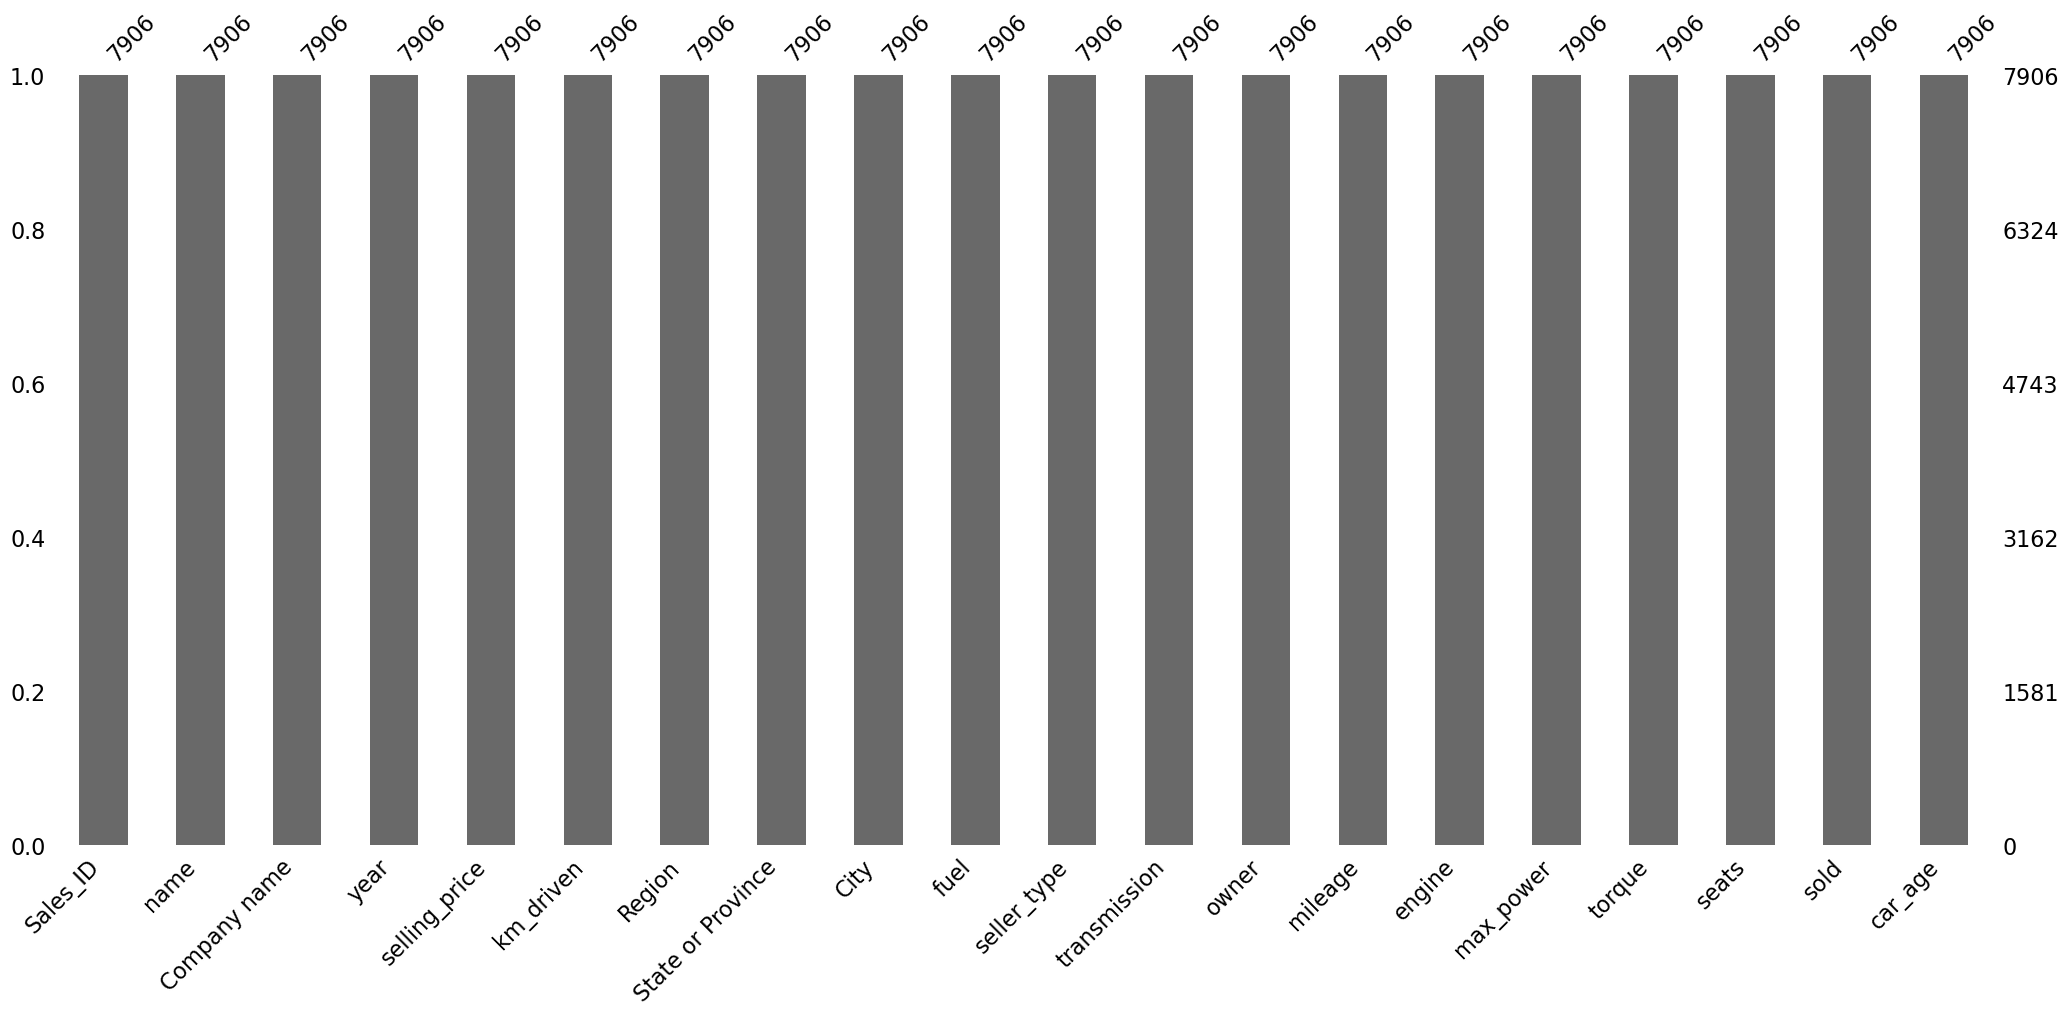

In [60]:
ms.bar(df)

#### There are no missing values 

In [61]:
df.isnull().sum()

Sales_ID             0
name                 0
Company name         0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
sold                 0
car_age              0
dtype: int64

#### There are no null values

In [62]:
df2.duplicated().sum()

0

#### No duplicates

In [63]:
df.name.nunique()

1982

#### There are 1982 unique car models 

In [64]:
df['Company name'].nunique()

31

#### There are 31 unique car brands 

In [65]:
df.describe()

,Sales_ID,year,selling_price,km_driven,seats,car_age
count,7906.000000,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000
mean,4070.106248,2013.983936,6.498137e+05,6.918866e+04,5.416393,9.016064
std,2345.770159,3.863695,8.135827e+05,5.679230e+04,0.959208,3.863695
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,2.000000,3.000000
25%,2037.250000,2012.000000,2.700000e+05,3.500000e+04,5.000000,6.000000
50%,4076.500000,2015.000000,4.500000e+05,6.000000e+04,5.000000,8.000000
75%,6102.000000,2017.000000,6.900000e+05,9.542500e+04,5.000000,11.000000
max,8128.000000,2020.000000,1.000000e+07,2.360457e+06,14.000000,29.000000


<AxesSubplot:ylabel='year'>

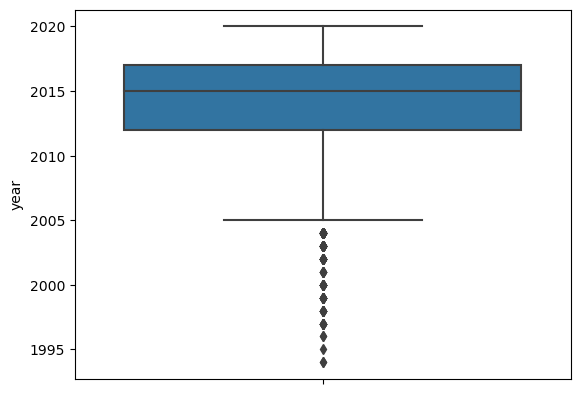

In [66]:
sns.boxplot(y='year',data=df4)

### Capping outliers for year column

In [67]:
max_year=df4['year'].quantile(0.99)
min_year=df4['year'].quantile(0.01)
df4['year']=np.clip(df4['year'],min_year,max_year)

<AxesSubplot:ylabel='year'>

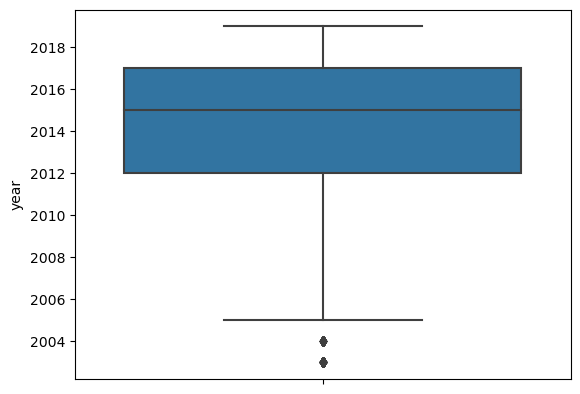

In [68]:
sns.boxplot(y='year',data=df4)

<AxesSubplot:ylabel='km_driven'>

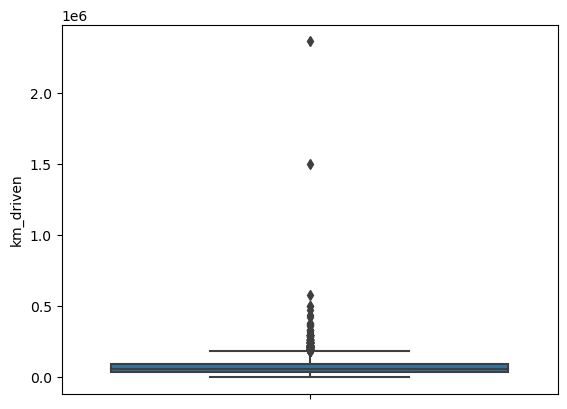

In [69]:
sns.boxplot(y='km_driven',data=df4)

### Capping outliers for km_driven column

In [70]:
max_km=df4['km_driven'].quantile(0.99)
min_km=df4['km_driven'].quantile(0.01)
df4['km_driven']=np.clip(df4['km_driven'],min_km,max_km)

<AxesSubplot:ylabel='km_driven'>

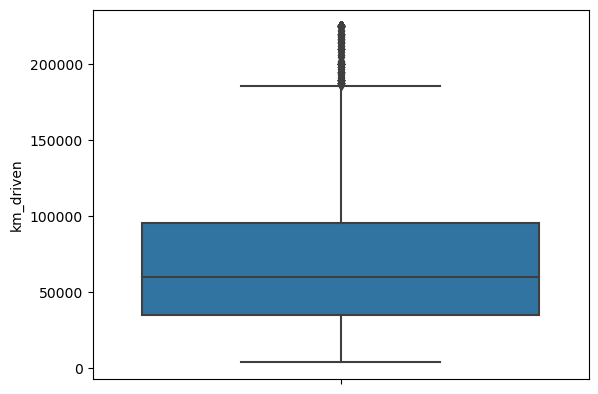

In [71]:
sns.boxplot(y='km_driven',data=df4)

## visualization for Categorical Data

In [72]:
df4.describe(include=object)

,name,Company name,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,sold
count,7906,7906,7906,7906,7906,7906,7906,7906,7906,7906,7906,7906,7906,7906
unique,1982,31,4,49,1310,4,3,2,5,393,121,320,441,2
top,Maruti Swift Dzire VDI,Maruti,Central,California,New York City,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,N
freq,129,2367,2376,901,196,4299,6563,6865,5215,225,1017,377,530,5906


<AxesSubplot:xlabel='year', ylabel='count'>

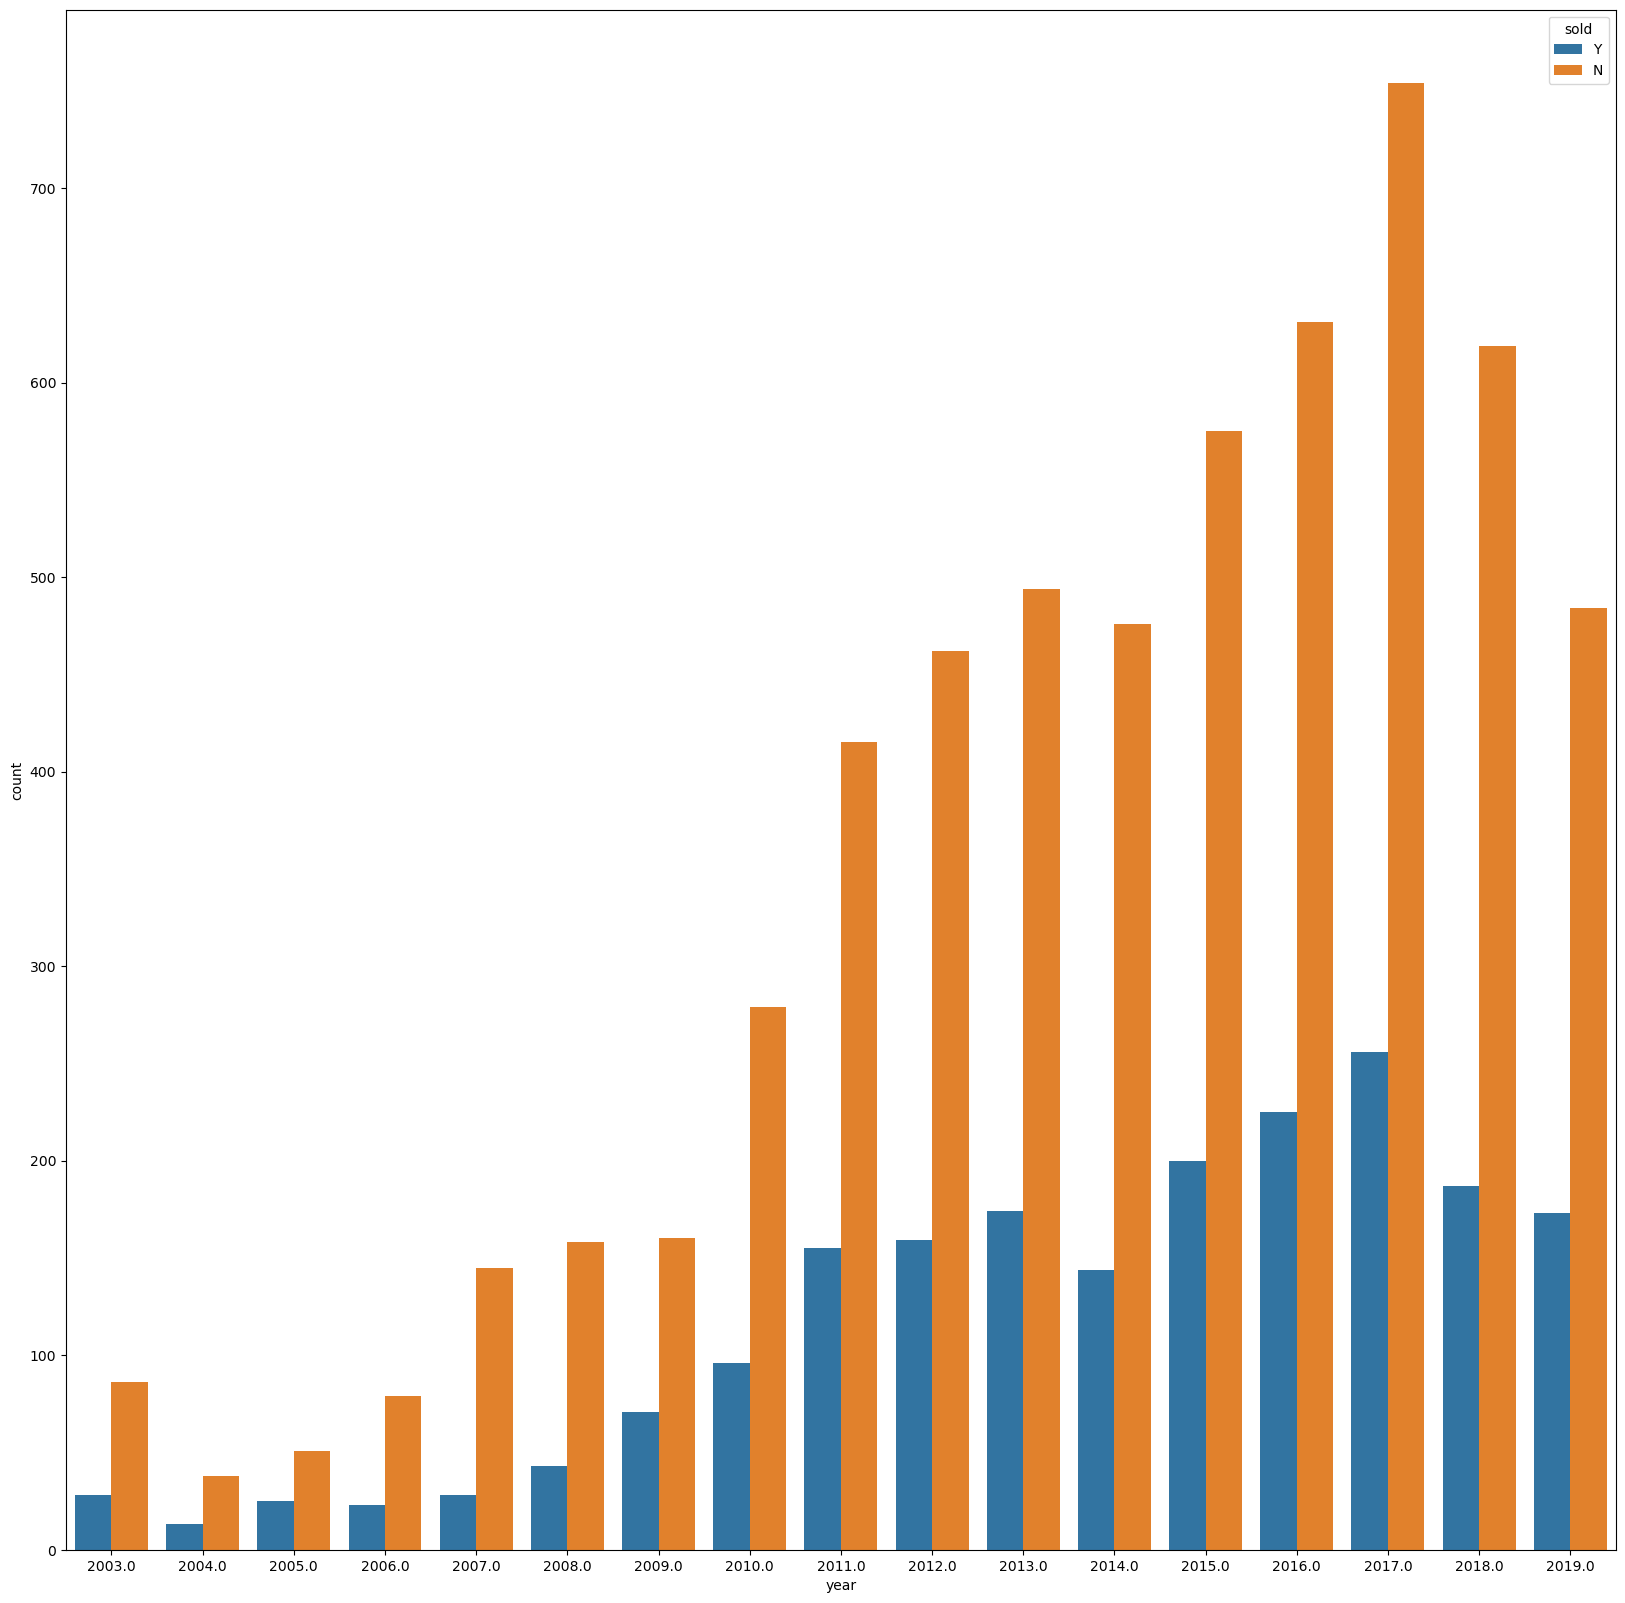

In [73]:
plt.figure(figsize=(20,20))
sns.countplot(x='year',data=df4,hue='sold')

<AxesSubplot:xlabel='Region', ylabel='count'>

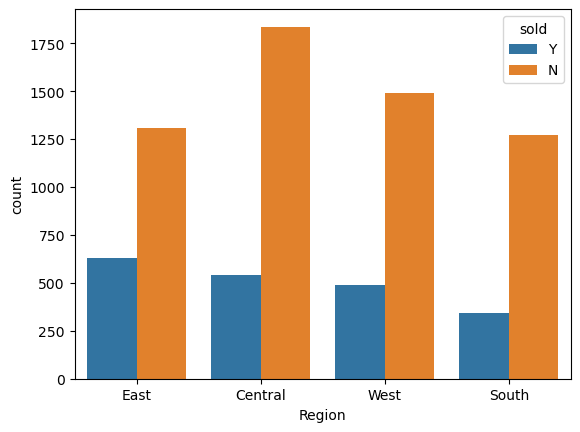

In [74]:
sns.countplot(x='Region',data=df4,hue='sold')

In [75]:
pd.crosstab(df['Region'],df['sold'],margins=True)

sold,N,Y,All
Region,,,
Central,1836,540,2376
East,1309,630,1939
South,1272,343,1615
West,1489,487,1976
All,5906,2000,7906


<AxesSubplot:xlabel='Company name', ylabel='count'>

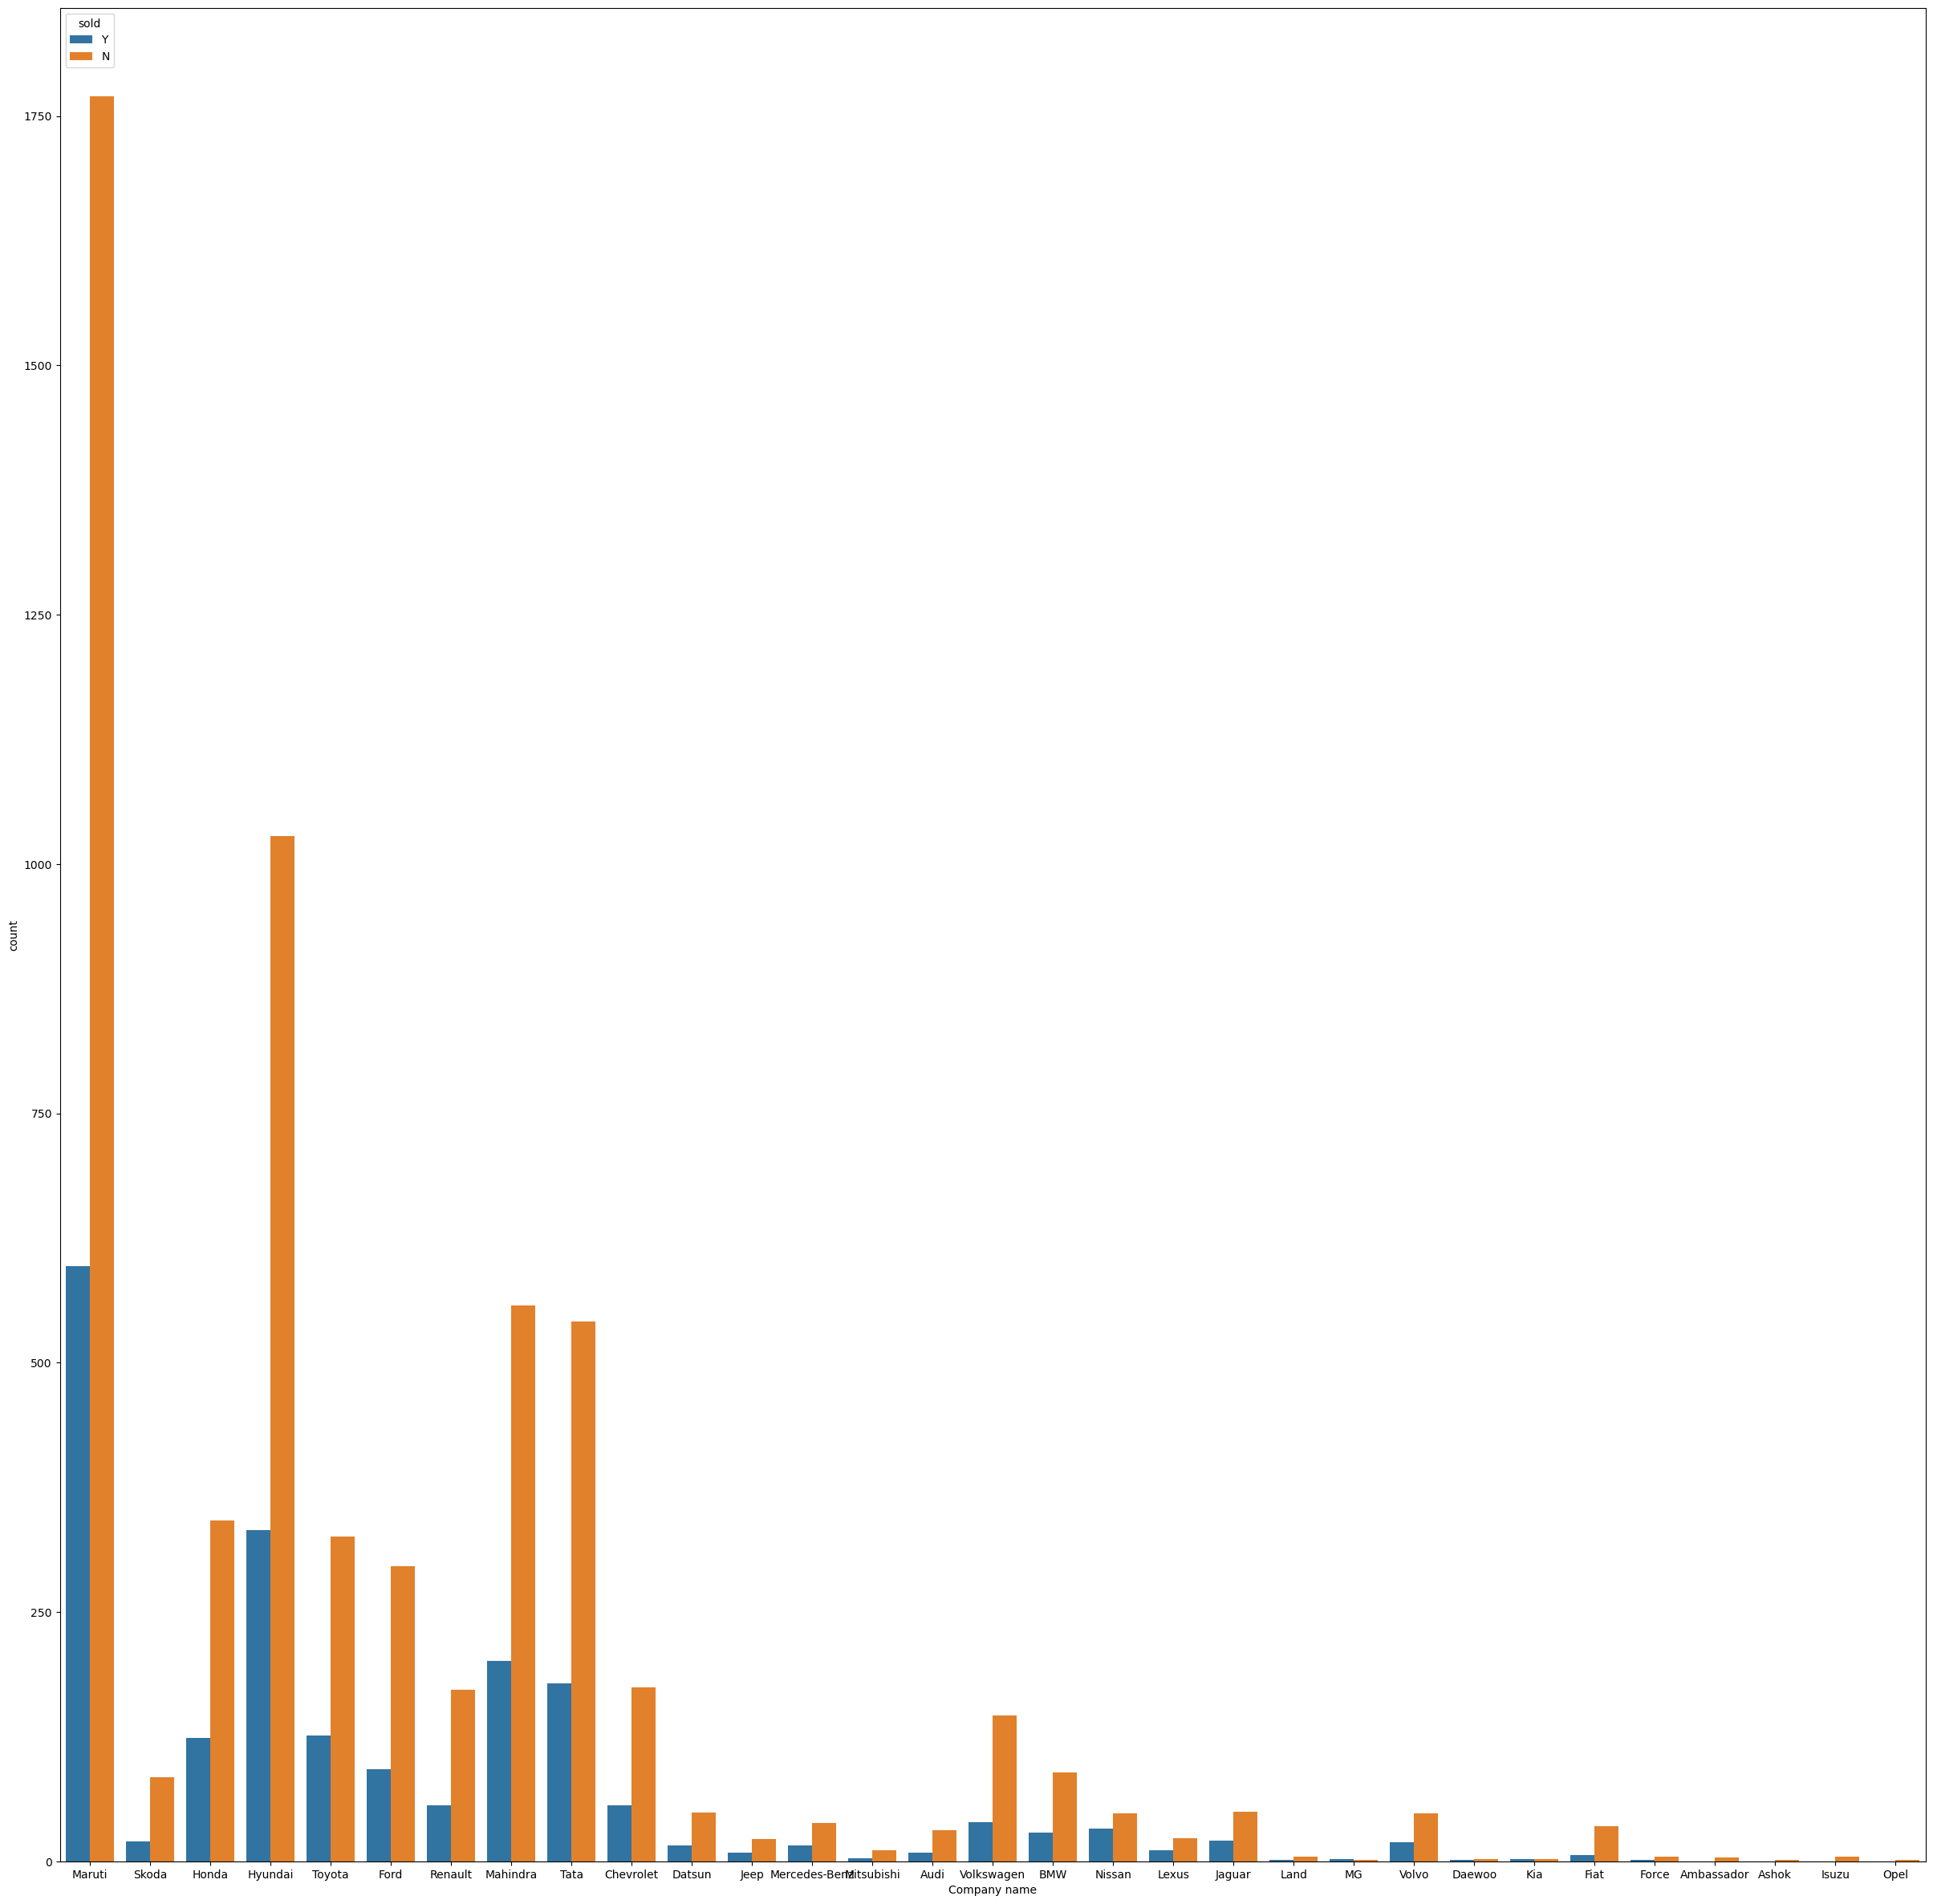

In [76]:
plt.figure(figsize=(30,30))
sns.countplot(x='Company name',data=df4,hue='sold')

<AxesSubplot:xlabel='Car_condition', ylabel='count'>

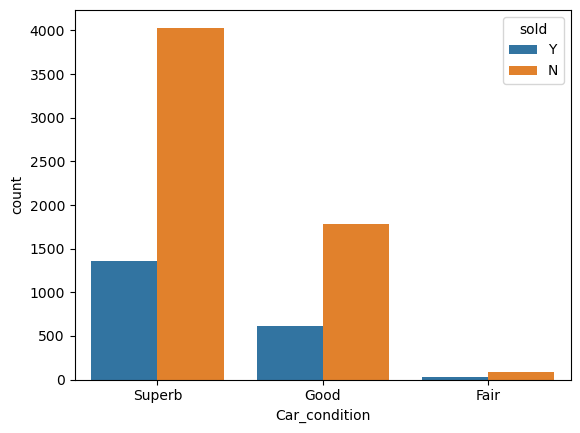

In [77]:
sns.countplot(x='Car_condition',data=df2,hue='sold')

<AxesSubplot:xlabel='seats', ylabel='count'>

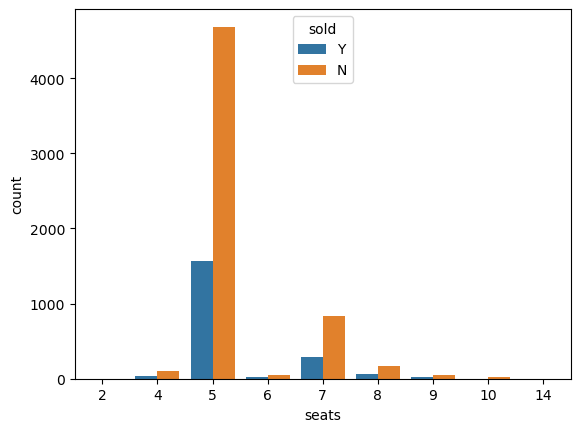

In [78]:
sns.countplot(x='seats',data=df2,hue='sold')

## visualization for Numerical Data

C:\Users\velur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

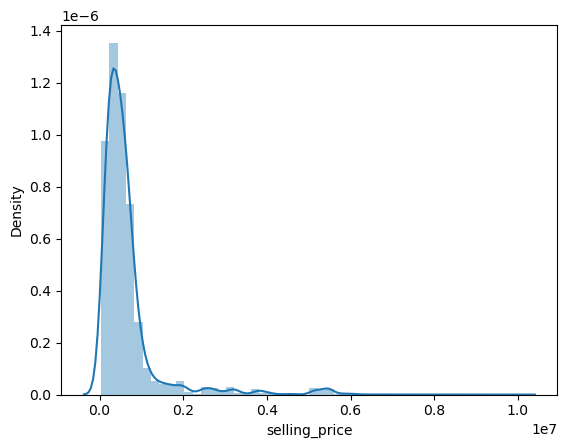

In [79]:
sns.distplot(df2['selling_price'])

C:\Users\velur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='km_driven', ylabel='Density'>

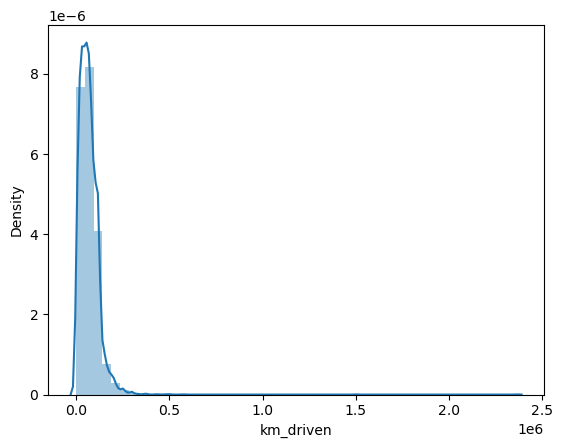

In [80]:
sns.distplot(df2['km_driven'])

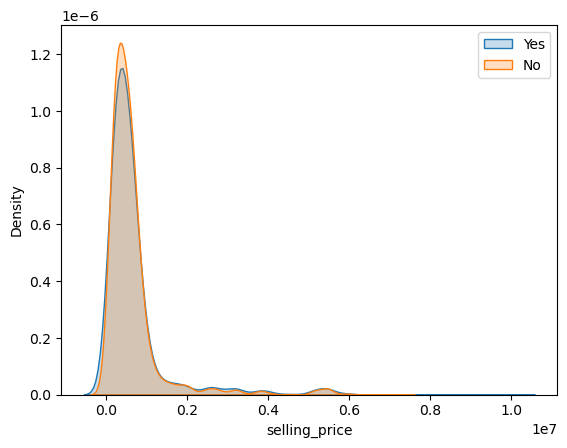

In [81]:
sns.color_palette()
sns.kdeplot(data= df2[df2['sold']=="Y"]['selling_price'],shade=True,label='Yes')
sns.kdeplot(data= df2[df2['sold']=="N"]['selling_price'],shade=True,label='No')
plt.legend()

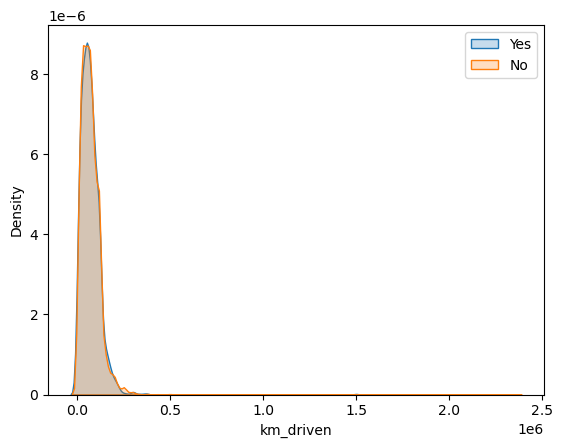

In [82]:
sns.color_palette()
sns.kdeplot(data= df2[df2['sold']=="Y"]['km_driven'],shade=True,label='Yes')
sns.kdeplot(data= df2[df2['sold']=="N"]['km_driven'],shade=True,label='No')
plt.legend()

C:\Users\velur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

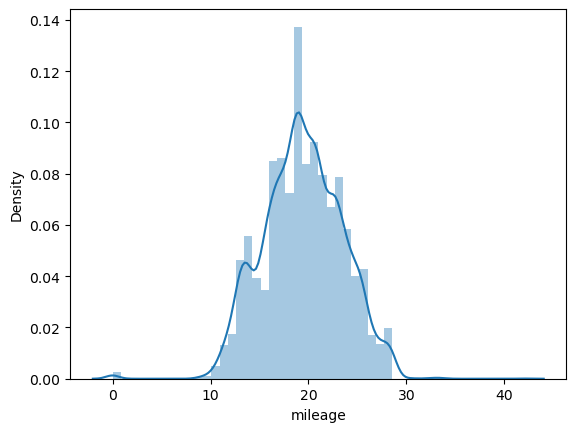

In [83]:
sns.distplot(df2['mileage'])

C:\Users\velur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='engine', ylabel='Density'>

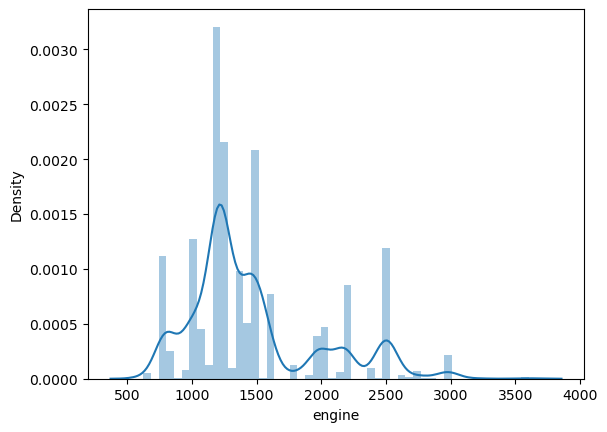

In [84]:
sns.distplot(df2['engine'])

C:\Users\velur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='max_power', ylabel='Density'>

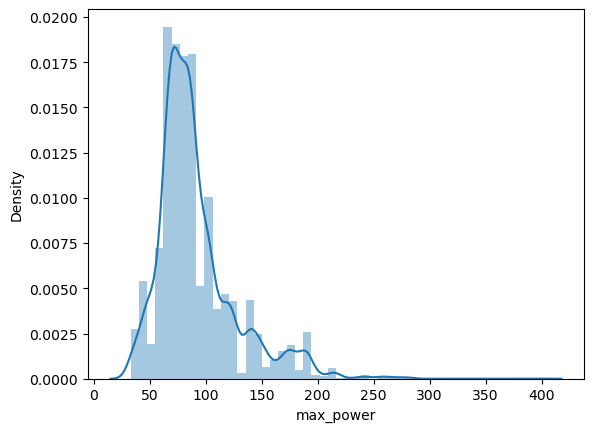

In [85]:
sns.distplot(df2['max_power'])

<AxesSubplot:xlabel='Company name'>

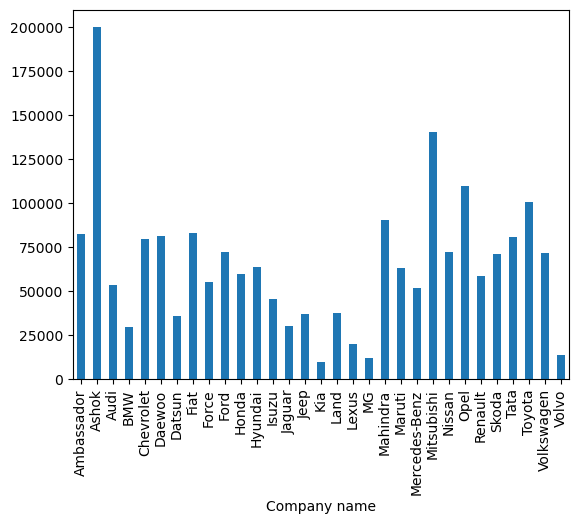

In [86]:
df2.groupby('Company name')['km_driven'].mean().plot(kind='bar')

<AxesSubplot:xlabel='State or Province'>

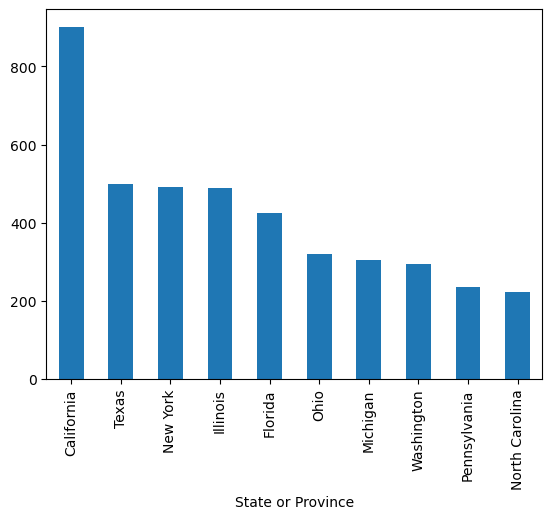

In [87]:
pd.crosstab(df2['Company name'],df2['State or Province']).sum().sort_values(ascending=False).head(10).plot(kind='bar')

C:\Users\velur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='selling_price', ylabel='km_driven'>

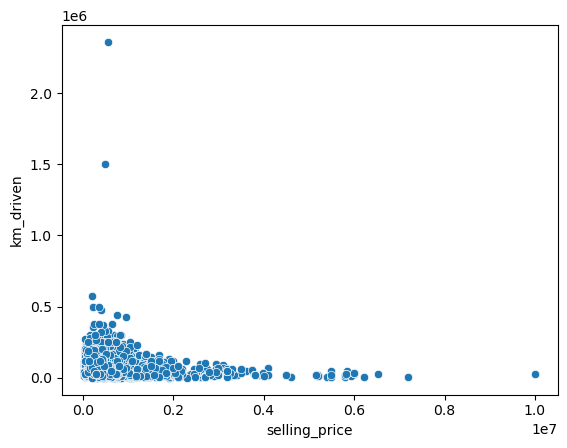

In [88]:
sns.scatterplot(df2['selling_price'],df2['km_driven'])

C:\Users\velur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='km_driven', ylabel='car_age'>

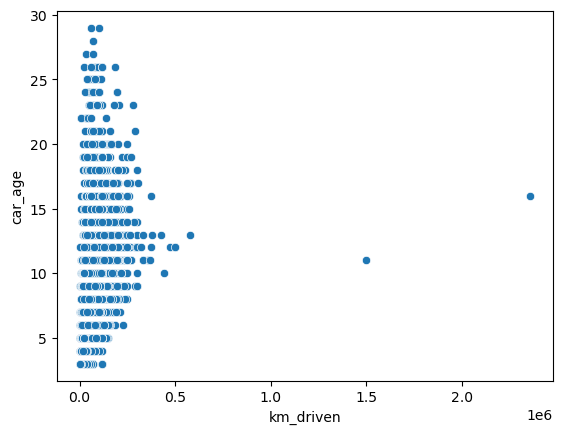

In [89]:
sns.scatterplot(df2['km_driven'],df2['car_age'])

C:\Users\velur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mileage', ylabel='car_age'>

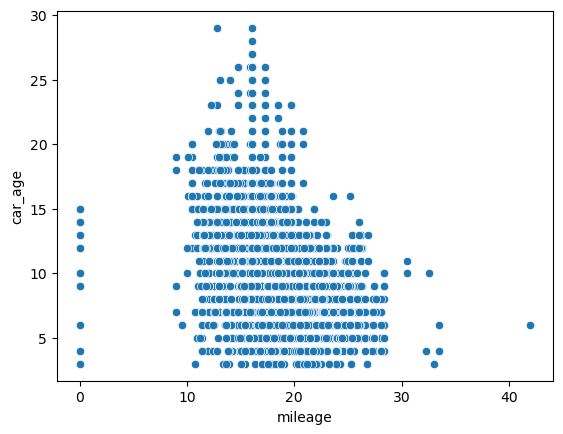

In [90]:
sns.scatterplot(df2['mileage'],df2['car_age'])

C:\Users\velur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine', ylabel='car_age'>

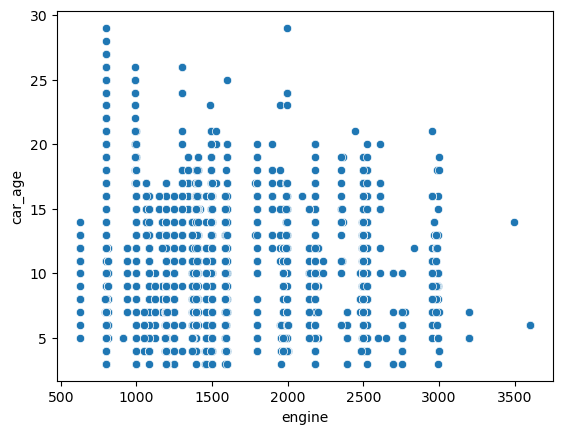

In [91]:
sns.scatterplot(df2['engine'],df2['car_age'])

C:\Users\velur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_power', ylabel='selling_price'>

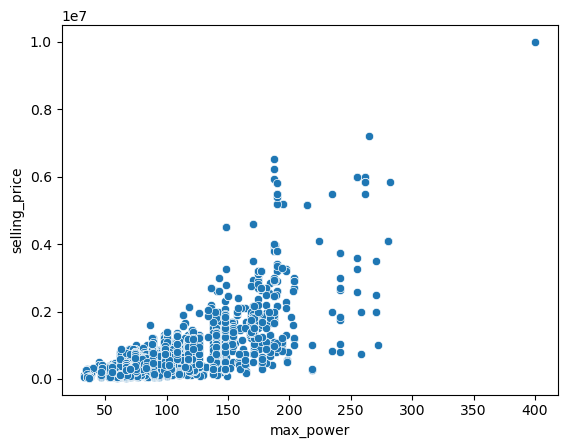

In [92]:
sns.scatterplot(df2['max_power'],df2['selling_price'])

<AxesSubplot:>

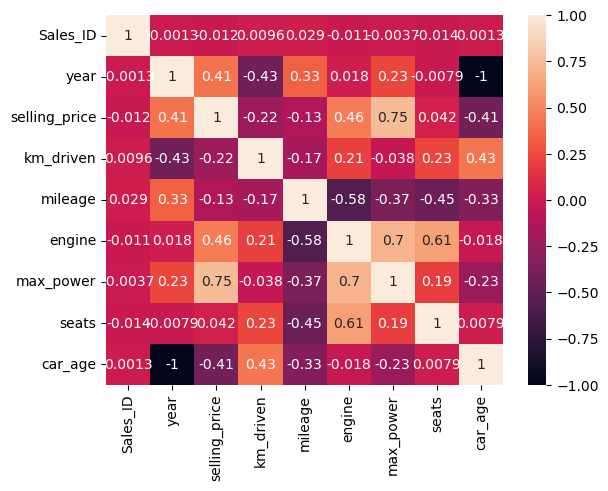

In [93]:
sns.heatmap(df2.corr(),annot=True)

In [94]:
df5=df2.copy()
df5.drop('Sales_ID',axis=1,inplace=True)
df5.drop('name',axis=1,inplace=True)
df5.drop('State or Province',axis=1,inplace=True)
df5.drop('torque',axis=1,inplace=True)

In [95]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,LabelEncoder

In [96]:
le=LabelEncoder()

In [97]:
df5

,Company name,year,selling_price,km_driven,Region,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,car_age,Car_condition
0,Maruti,2014,450000,145500,East,Washington,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Y,9,Superb
1,Skoda,2014,370000,120000,East,New York City,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,Y,9,Superb
2,Honda,2006,158000,140000,Central,Chicago,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Y,17,Good
3,Hyundai,2010,225000,127000,Central,Chicago,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Y,13,Good
4,Maruti,2007,130000,120000,East,New York City,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Y,16,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,Hyundai,2013,320000,110000,Central,Plano,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5,N,10,Superb
7902,Hyundai,2007,135000,119000,Central,Port Arthur,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5,N,16,Good
7903,Maruti,2009,382000,120000,Central,Port Arthur,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5,N,14,Good
7904,Tata,2013,290000,25000,East,Lunenburg,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,5,N,10,Superb


In [98]:
df5['Company name']=le.fit_transform(df5['Company name'])
df5['Region']=le.fit_transform(df5['Region'])
df5['City']=le.fit_transform(df5['City'])
df5['fuel']=le.fit_transform(df5['fuel'])
df5['seller_type']=le.fit_transform(df5['seller_type'])
df5['transmission']=le.fit_transform(df5['transmission'])
df5['owner']=le.fit_transform(df5['owner'])
df5['sold']=le.fit_transform(df5['sold'])
df5['Car_condition']=le.fit_transform(df5['Car_condition'])

In [99]:
df5

,Company name,year,selling_price,km_driven,Region,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,car_age,Car_condition
0,20,2014,450000,145500,1,1223,1,1,1,0,23.40,1248,74.00,5,1,9,2
1,26,2014,370000,120000,1,786,1,1,1,2,21.14,1498,103.52,5,1,9,2
2,10,2006,158000,140000,0,193,3,1,1,4,17.70,1497,78.00,5,1,17,1
3,11,2010,225000,127000,0,193,1,1,1,0,23.00,1396,90.00,5,1,13,1
4,20,2007,130000,120000,1,786,3,1,1,0,16.10,1298,88.20,5,1,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,11,2013,320000,110000,0,922,3,1,1,0,18.50,1197,82.85,5,0,10,2
7902,11,2007,135000,119000,0,935,1,1,1,1,16.80,1493,110.00,5,0,16,1
7903,20,2009,382000,120000,0,935,1,1,1,0,19.30,1248,73.90,5,0,14,1
7904,27,2013,290000,25000,1,658,1,1,1,0,23.57,1396,70.00,5,0,10,2


In [100]:
dfm=df5.copy()
minmax=MinMaxScaler()
for i in dfm.columns:
    dfm[i]=minmax.fit_transform(dfm[i].values.reshape(-1,1))